In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

In [3]:
##
## Data Import
##

filePath = "C:/Users/ayaan/OneDrive/Desktop/lyde_data_v3/lyde_data_v3/lyde_10k.csv"
data_df = pd.read_csv(filePath)

In [4]:
data_df = data_df.dropna()

In [29]:
# Looking for any immediate issues in the dataset

data_df.info()
data_df.iloc[:,1:].describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14407 entries, 0 to 15021
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         14407 non-null  float64
 1   latitude          14407 non-null  float64
 2   bio_year          14407 non-null  int64  
 3   lyde_present      14407 non-null  object 
 4   lyde_established  14407 non-null  object 
 5   lyde_density      14407 non-null  object 
 6   county            14407 non-null  object 
 7   state             14407 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1013.0+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
latitude,14407.0,NaN,NaN,NaN,39.851768,2.043807,29.459459,39.009009,40.27027,41.171171,45.675676
bio_year,14407.0,NaN,NaN,NaN,2020.197057,2.218702,2014.0,2019.0,2021.0,2022.0,2023.0
lyde_present,14407,2,False,8839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lyde_established,14407,2,False,10408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lyde_density,14407,4,Unpopulated,10417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county,14407,493,Erie County,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,14407,34,Pennsylvania,6630,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\ayaan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ayaan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ayaan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ayaan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

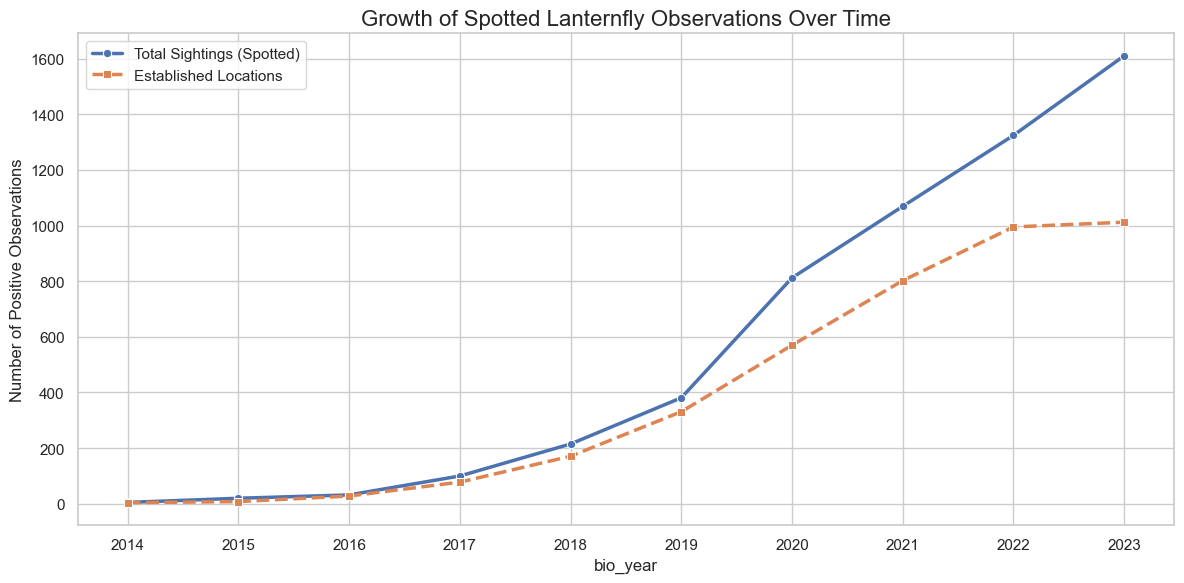

In [5]:
year_sums = data_df.groupby('bio_year')[['lyde_present','lyde_established']].sum().reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot 'Spotted '  observations
sns.lineplot(data=year_sums, x='bio_year', y='lyde_present', 
             marker='o', label='Total Sightings (Spotted)', linewidth=2.5)

# Plot 'Established' observations
sns.lineplot(data=year_sums, x='bio_year', y='lyde_established', 
             marker='s', label='Established Locations', linewidth=2.5, linestyle='--')

# Formatting the charts
plt.title('Growth of Spotted Lanternfly Observations Over Time', fontsize=16)
plt.xlabel('bio_year', fontsize=12)
plt.ylabel('Number of Positive Observations', fontsize=12)
plt.xticks(year_sums['bio_year'].unique()) # Ensure every year is labeled
plt.legend()
plt.tight_layout()

plt.show()

In [16]:
###
### Add county names to dataset (feature engineering)
###

from geopy.geocoders import Nominatim
import time
from geopy.location import Location
geolocator = Nominatim(user_agent="SLF County Mapping (10k)")

# Code to append county names onto SLF dataset

county = []
state = []

for index, row in data_df.iterrows():
    coords = (row['latitude'], row['longitude'])
    county_result = None
    state_result = None
    
    try:
        # Perform reverse geocoding
        location: Location = geolocator.reverse(coords)
        
        # Extract the full address string from the Location object
        if location and location.raw and 'address' in location.raw:
            
            # We store the full address here, as extracting only the 'county' 
            address_parts = location.raw['address']
            
            # is often unreliable across different regions.
            county_result = address_parts.get('county') or address_parts.get('state_district') or 'Unknown County'
            state_result = address_parts.get('state')
            
        else:
            county_result = "Address not found"
            state_result = "unkown"

        print(f"Row {index}: Coordinates {coords} -> Result: {county_result}, {state_result}")

            
    except Exception as e:
        print(f"Row {index}: Error during lookup for {coords}. Error: {e}")
        
    county.append(county_result)
    state.append(state_result)
    
    # CRITICAL: Wait 1 second before the next request, Nominatim services requires it.
    time.sleep(1) 

Row 0: Coordinates (44.59459459459459, -123.29411764705884) -> Result: Benton County, Oregon
Row 1: Coordinates (44.95495495495495, -123.05882352941175) -> Result: Polk County, Oregon
Row 2: Coordinates (45.49549549549549, -123.05882352941175) -> Result: Washington County, Oregon
Row 3: Coordinates (45.49549549549549, -122.94117647058825) -> Result: Washington County, Oregon
Row 4: Coordinates (45.49549549549549, -122.94117647058825) -> Result: Washington County, Oregon
Row 5: Coordinates (45.585585585585584, -122.82352941176472) -> Result: Multnomah County, Oregon
Row 6: Coordinates (45.22522522522522, -122.70588235294116) -> Result: Clackamas County, Oregon
Row 7: Coordinates (45.49549549549549, -122.70588235294116) -> Result: Multnomah County, Oregon
Row 8: Coordinates (45.585585585585584, -122.70588235294116) -> Result: Multnomah County, Oregon
Row 9: Coordinates (45.585585585585584, -122.70588235294116) -> Result: Multnomah County, Oregon
Row 10: Coordinates (45.67567567567567, -1

NameError: name 'output_file_name' is not defined

In [19]:
data_df.to_csv(filePath, index=False)

print(f"Updated DataFrame saved to '{filePath}'")

Updated DataFrame saved to 'C:/Users/ayaan/OneDrive/Desktop/lyde_data_v3/lyde_data_v3/lyde_10k.csv'


In [20]:
data_df.iloc[:,1:].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
latitude,14419.0,NaN,NaN,NaN,39.850966,2.045087,29.459459,39.009009,40.27027,41.171171,45.675676
bio_year,14419.0,NaN,NaN,NaN,2020.197101,2.218628,2014.0,2019.0,2021.0,2022.0,2023.0
lyde_present,14419,2,False,8846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lyde_established,14419,2,False,10419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lyde_density,14419,4,Unpopulated,10428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county,14413,493,Erie County,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,14407,34,Pennsylvania,6630,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_df.isnull().sum()

longitude           0
latitude            0
bio_year            0
lyde_present        0
lyde_established    0
lyde_density        0
county              0
state               0
dtype: int64

In [7]:
data_df.dropna(inplace=True)

In [8]:
has_duplicates = data_df.duplicated().any()
print(f"Does this DataFrame have any duplicate rows? {has_duplicates}")

Does this DataFrame have any duplicate rows? False


In [9]:
data_df.shape

(14407, 8)

In [30]:
data_df.head()

,longitude,latitude,bio_year,lyde_present,lyde_established,lyde_density,county,state
0,-123.294118,44.594595,2020,False,False,Unpopulated,Benton County,Oregon
1,-123.058824,44.954955,2022,False,False,Unpopulated,Polk County,Oregon
2,-123.058824,45.495495,2022,False,False,Unpopulated,Washington County,Oregon
3,-122.941176,45.495495,2020,False,False,Unpopulated,Washington County,Oregon
4,-122.941176,45.495495,2022,False,False,Unpopulated,Washington County,Oregon


In [22]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,14407.0,-78.233179,5.541838,-123.294118,-79.294118,-77.411765,-75.764706,-68.000000
latitude,14407.0,39.851768,2.043807,29.459459,39.009009,40.270270,41.171171,45.675676
bio_year,14407.0,2020.197057,2.218702,2014.000000,2019.000000,2021.000000,2022.000000,2023.000000


In [91]:
filePath2 = "C:/Users/ayaan/Downloads/FruitAcreageOh.csv"
CountyStats = pd.read_csv(filePath2)
CountyStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511 entries, 0 to 3510
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           3511 non-null   object 
 1   Year              3511 non-null   int64  
 2   Period            3511 non-null   object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         3511 non-null   object 
 5   State             3511 non-null   object 
 6   State ANSI        3511 non-null   int64  
 7   Ag District       3511 non-null   object 
 8   Ag District Code  3511 non-null   int64  
 9   County            3511 non-null   object 
 10  County ANSI       3511 non-null   int64  
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    3511 non-null   int64  
 14  Watershed         0 non-null      float64
 15  Commodity         3511 non-null   object 
 16  Data Item         3511 non-null   object 


In [92]:
CountyStats = CountyStats.drop(['Period', 'Week Ending', 'Geo Level', 'State', 'State ANSI', 'Ag District Code', 'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed'], axis=1)
CountyStats.iloc[:,1:].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,3511.0,NaN,NaN,NaN,2014.946454,6.616132,2002.0,2012.0,2017.0,2022.0,2022.0
Ag District,3511,9,NORTHEAST,626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County,3511,88,LICKING,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commodity,3511,26,PEACHES,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data Item,3511,36,APPLES - ACRES BEARING,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domain,3511,1,TOTAL,3511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domain Category,3511,1,NOT SPECIFIED,3511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,3511,161,(D),2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV (%),2671,54,(D),1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
CountyStats.isnull().sum()
CountyStats.shape

(3511, 10)

In [38]:
CountyStats.to_csv(filePath2, index=False)

print(f"Updated DataFrame saved to '{filePath2}'")

Updated DataFrame saved to 'C:/Users/ayaan/Downloads/C4204342-04C9-38A9-9D59-F177E78DF7F6.csv'


In [94]:
CountyStats.head()

,Program,Year,Ag District,County,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,CENTRAL,DELAWARE,APPLES,APPLES - ACRES BEARING,TOTAL,NOT SPECIFIED,(D),(D)
1,CENSUS,2022,CENTRAL,DELAWARE,BLACKBERRIES,"BLACKBERRIES, INCL DEWBERRIES & MARIONBERRIES ...",TOTAL,NOT SPECIFIED,(D),(D)
2,CENSUS,2022,CENTRAL,DELAWARE,CHERRIES,"CHERRIES, SWEET - ACRES BEARING",TOTAL,NOT SPECIFIED,(D),(D)
3,CENSUS,2022,CENTRAL,DELAWARE,CHERRIES,"CHERRIES, TART - ACRES BEARING",TOTAL,NOT SPECIFIED,(D),(D)
4,CENSUS,2022,CENTRAL,DELAWARE,ELDERBERRIES,ELDERBERRIES - ACRES BEARING,TOTAL,NOT SPECIFIED,(D),(D)


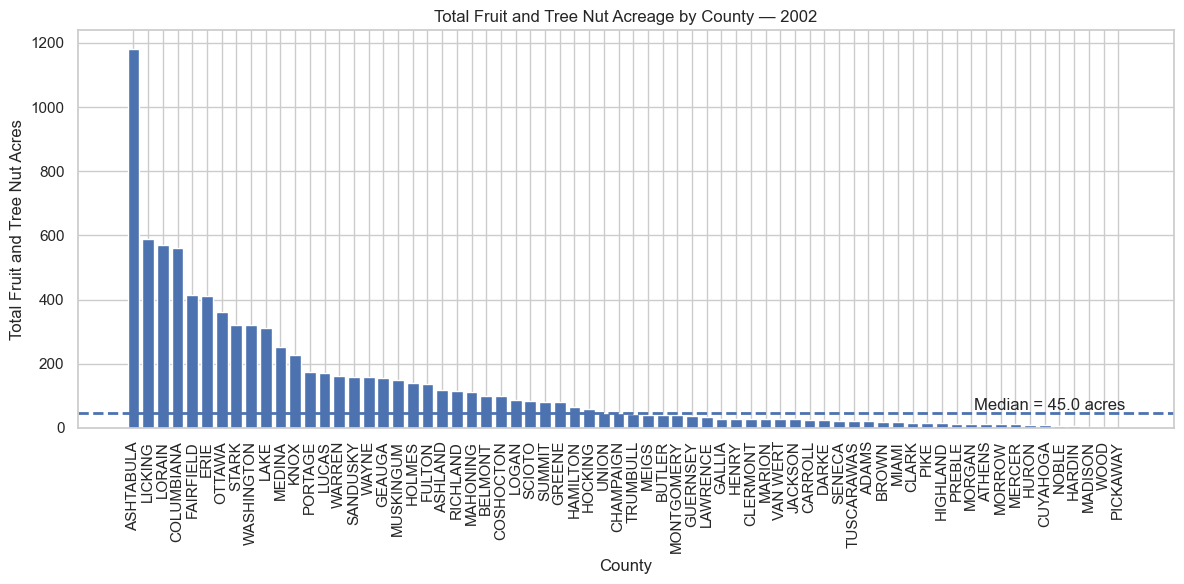

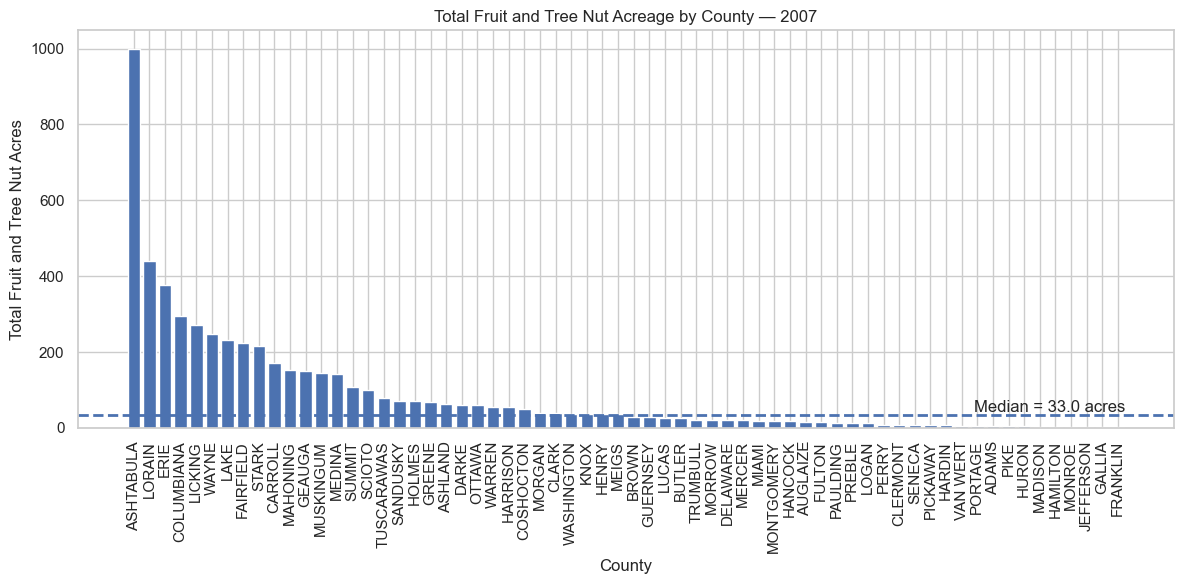

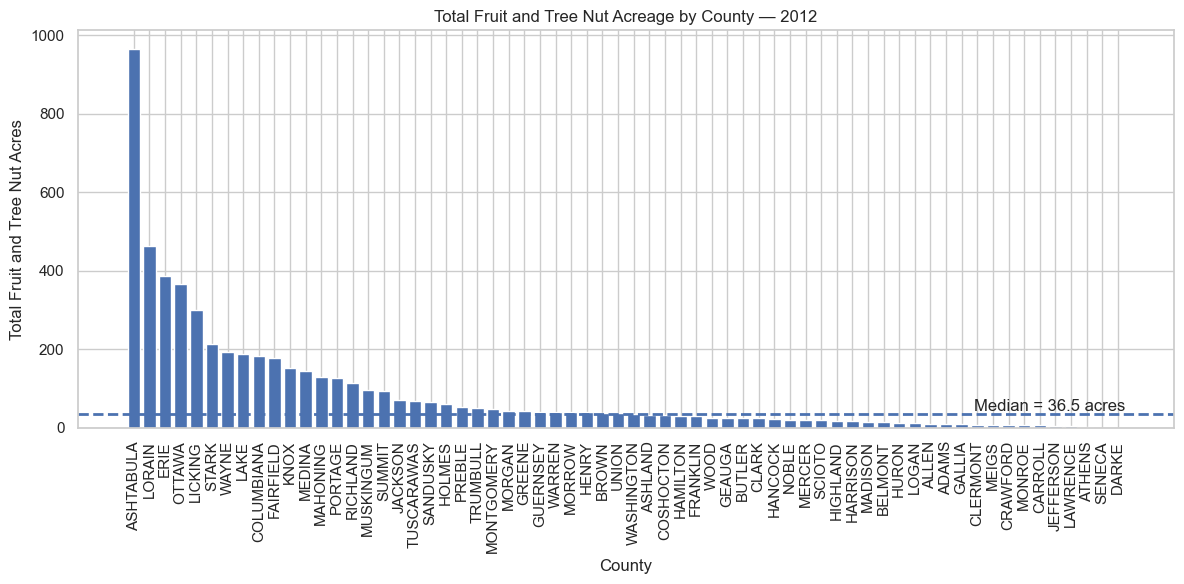

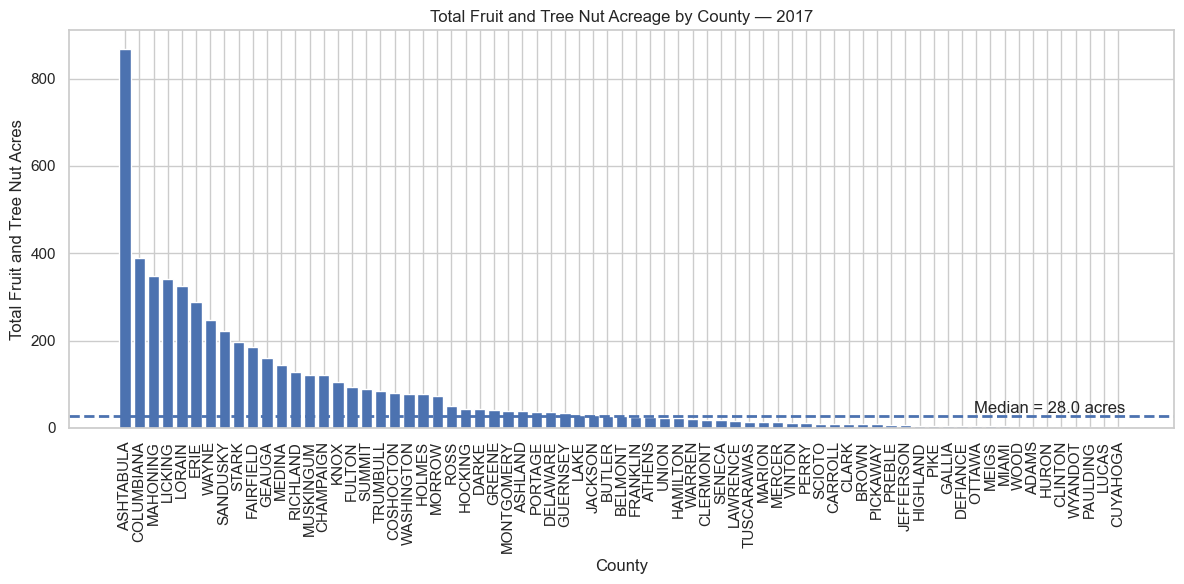

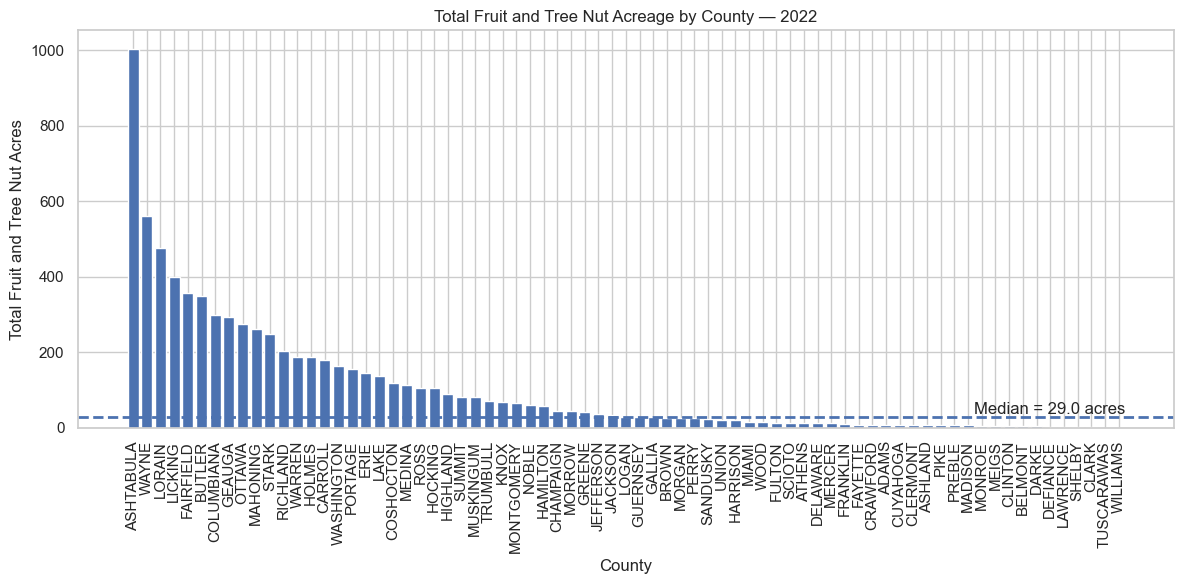

In [97]:
# Rank Counties via acreage

acre_df = CountyStats

SPECIAL = {"(D)", "(Z)", "(L)", "(H)", "(NA)", "(X)"}

def parse_value(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s in SPECIAL:
        return np.nan
    return float(s.replace(",", ""))

acre_df["acreage"] = acre_df["Value"].apply(parse_value)

county_year_acres = (
    acre_df
    .dropna(subset=["acreage"])
    .groupby(["County", "Year"], as_index=False)
    .agg(total_fruit_acres=("acreage", "sum"))
)

years = sorted(county_year_acres["Year"].unique())

for year in years:
    sub = (
        county_year_acres[county_year_acres["Year"] == year]
        .sort_values("total_fruit_acres", ascending=False)
    )

    # Use median for robustness to skew
    mean_val = sub["total_fruit_acres"].median()
    label = "Median"


    plt.figure(figsize=(12, 6))
    plt.bar(sub["County"], sub["total_fruit_acres"])

    # Mean line
    plt.axhline(mean_val, linestyle="--", linewidth=2)

    # Label the mean (right side of plot)
    plt.text(
        x=len(sub) - 0.5,
        y=mean_val,
        s=f"Median = {mean_val:,.1f} acres",
        va="bottom",
        ha="right"
    )

    plt.title(f"Total Fruit and Tree Nut Acreage by County — {year}")
    plt.xlabel("County")
    plt.ylabel("Total Fruit and Tree Nut Acres")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
# Counties with missing fruit growing data ex: Franklin

In [75]:
filepath3 = "C:/Users/ayaan/Downloads/FruitAndTreeNutSalesEachCountyYrly.csv"
fruitSales = pd.read_csv(filepath3)
fruitSales.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,YEAR,NaN,COUNTY,OHIO,39,CENTRAL,50,DELAWARE,41,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"312,000",(L)
1,CENSUS,2022,YEAR,NaN,COUNTY,OHIO,39,CENTRAL,50,FAIRFIELD,45,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"2,432,000",(L)
2,CENSUS,2022,YEAR,NaN,COUNTY,OHIO,39,CENTRAL,50,FAYETTE,47,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"309,000",(L)
3,CENSUS,2022,YEAR,NaN,COUNTY,OHIO,39,CENTRAL,50,FRANKLIN,49,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"274,000",(L)
4,CENSUS,2022,YEAR,NaN,COUNTY,OHIO,39,CENTRAL,50,KNOX,83,NaN,NaN,0,NaN,FRUIT & TREE NUT TOTALS,"FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"1,127,000",(L)


In [76]:
fruitSales = fruitSales.drop(['Period', 'Week Ending', 'Geo Level', 'State', 'State ANSI', 'Ag District Code', 'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed'], axis=1)

In [82]:
fruitSales.isnull().sum()
fruitSales.dropna()
fruitSales.shape

(525, 10)

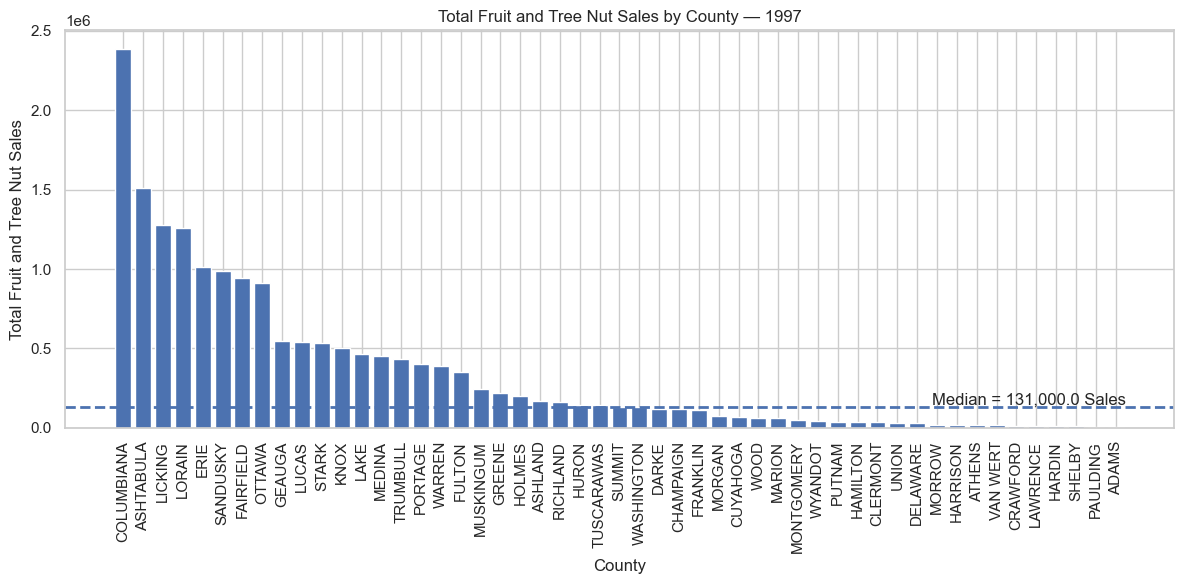

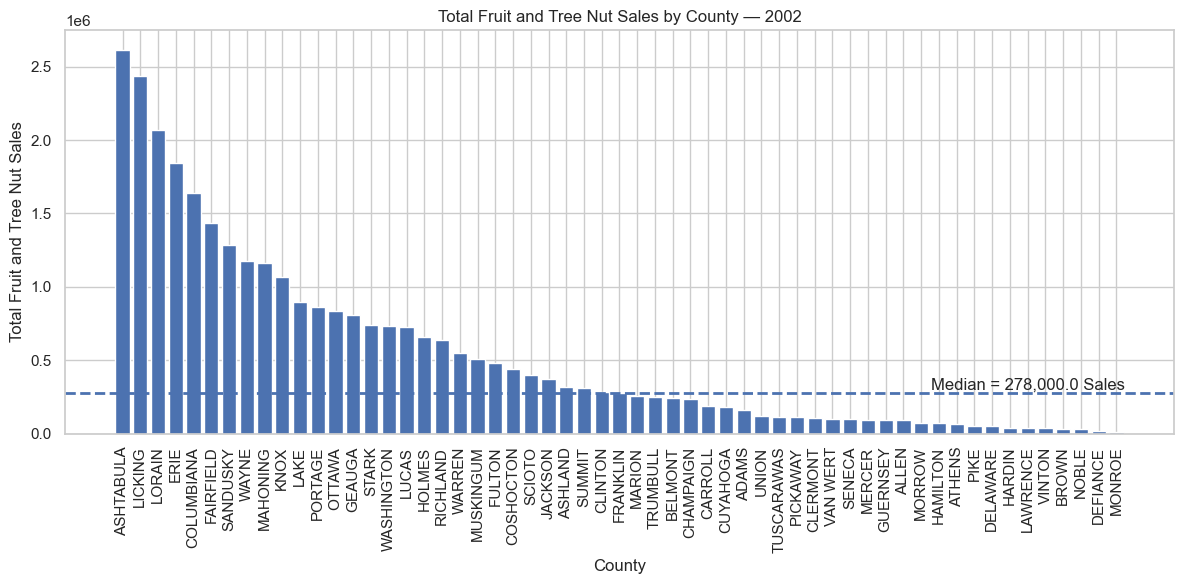

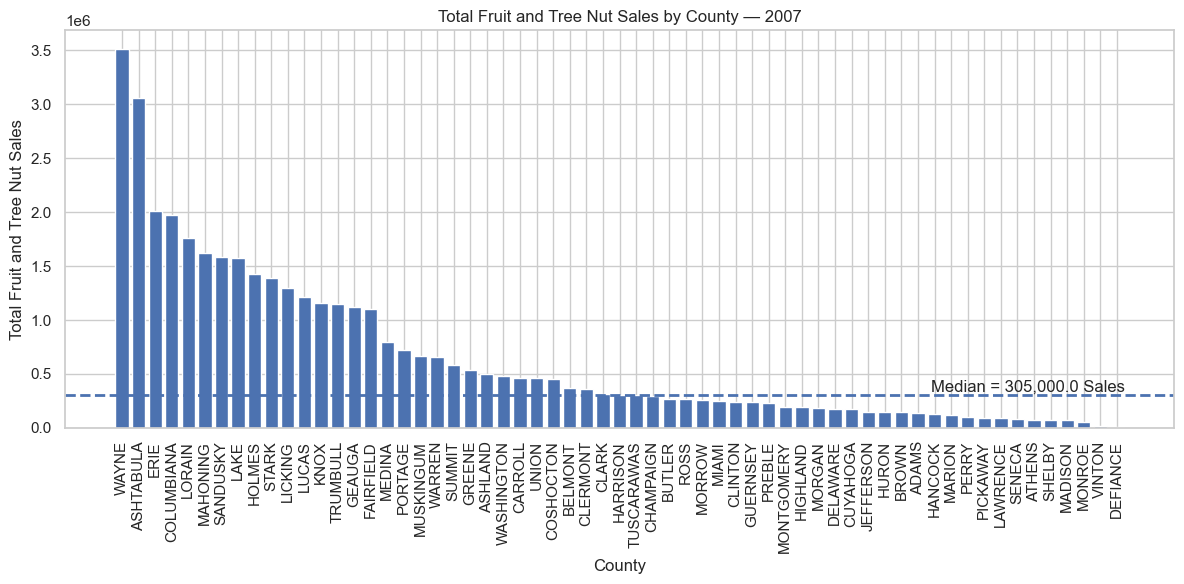

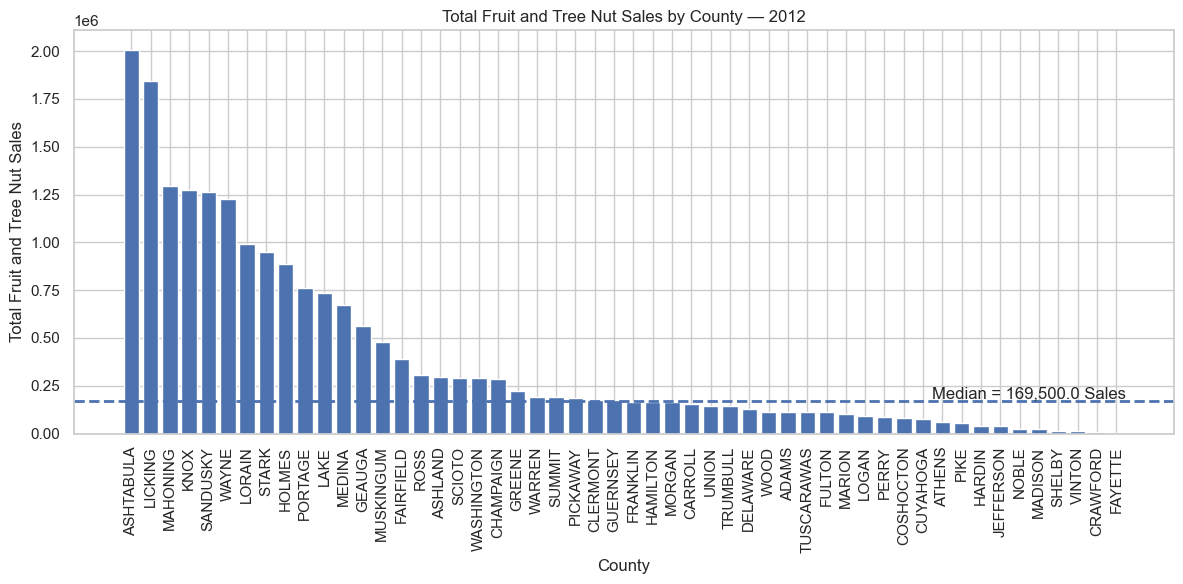

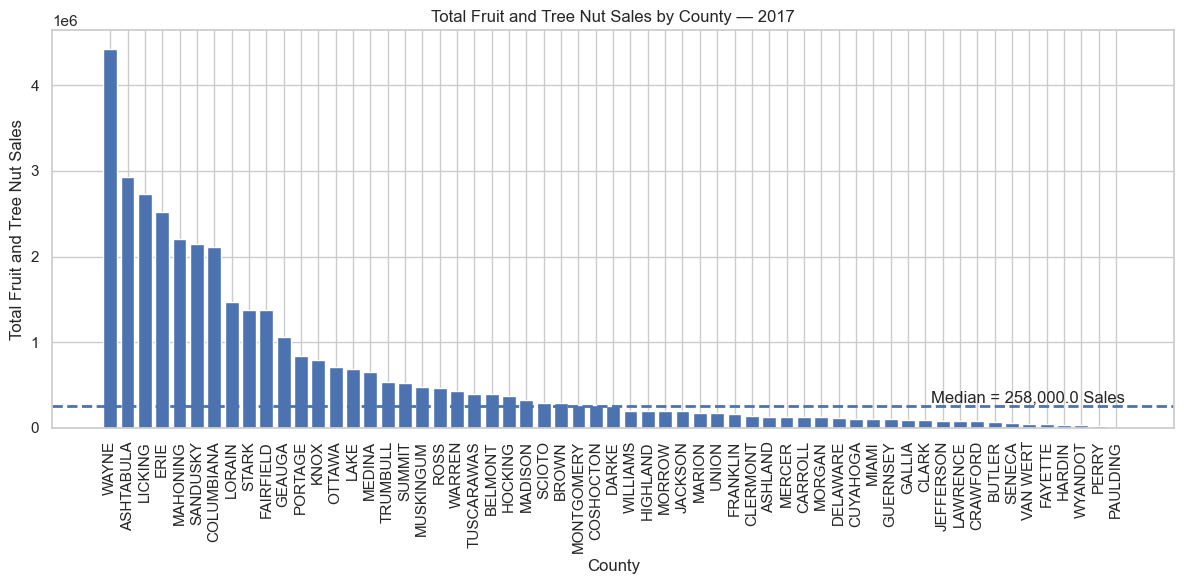

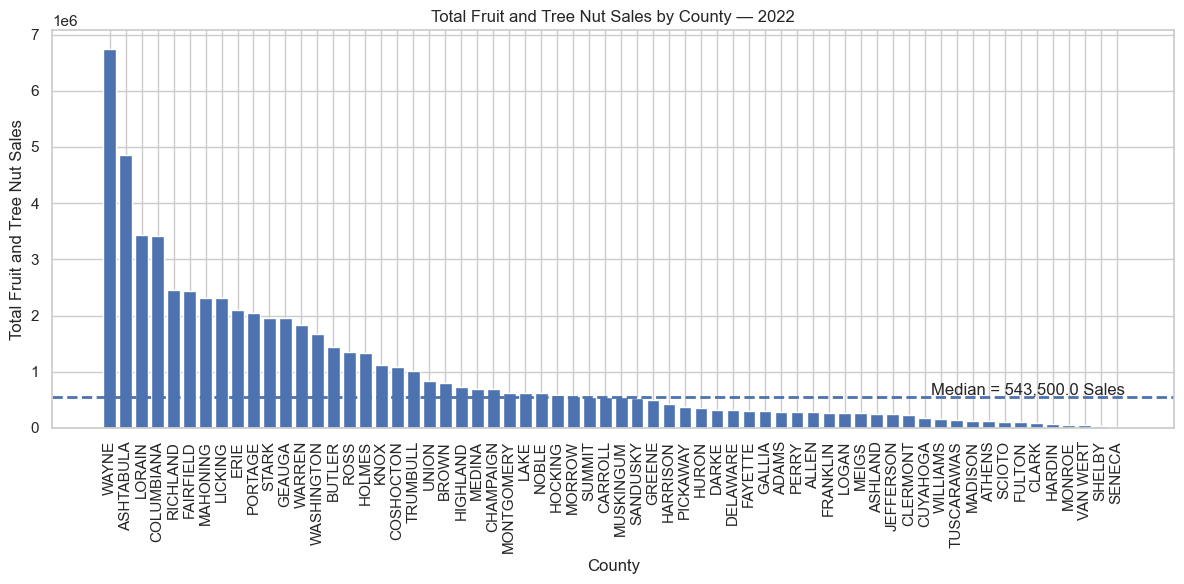

In [96]:
# Rank Counties via Fruit & Tree Nut Sales

sales_df = fruitSales

sales_df["Sales"] = fruitSales["Value"].apply(parse_value)

county_year_Sales = (
    sales_df
    .dropna(subset=["Sales"])
    .groupby(["County", "Year"], as_index=False)
    .agg(total_sales=("Sales", "sum"))
)

years = sorted(county_year_Sales["Year"].unique())

for year in years:
    sub = (
        county_year_Sales[county_year_Sales["Year"] == year]
        .sort_values("total_sales", ascending=False)
    )

    # Use median for robustness to skew
    mean_val = sub["total_sales"].median()
    label = "Median"


    plt.figure(figsize=(12, 6))
    plt.bar(sub["County"], sub["total_sales"])

    # Mean line
    plt.axhline(mean_val, linestyle="--", linewidth=2)

    # Label the mean (right side of plot)
    plt.text(
        x=len(sub) - 0.5,
        y=mean_val,
        s=f"Median = {mean_val:,.1f} Sales",
        va="bottom",
        ha="right"
    )

    plt.title(f"Total Fruit and Tree Nut Sales by County ($)— {year}")
    plt.xlabel("County")
    plt.ylabel("Total Fruit and Tree Nut Sales")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [74]:
data_df[data_df['state'] == 'Ohio']

,longitude,latitude,bio_year,lyde_present,lyde_established,lyde_density,county,state
682,-84.705882,41.171171,2021,False,False,Unpopulated,Paulding County,Ohio
683,-84.705882,41.441441,2020,False,False,Unpopulated,Williams County,Ohio
684,-84.705882,41.441441,2021,False,False,Unpopulated,Williams County,Ohio
696,-84.588235,39.099099,2020,False,False,Unpopulated,Hamilton County,Ohio
697,-84.588235,39.099099,2022,True,False,Unpopulated,Hamilton County,Ohio
...,...,...,...,...,...,...,...,...
1793,-80.588235,40.630631,2023,True,False,Unpopulated,Columbiana County,Ohio
1794,-80.588235,40.720721,2023,False,False,Unpopulated,Columbiana County,Ohio
1795,-80.588235,40.810811,2023,False,False,Unpopulated,Columbiana County,Ohio
1796,-80.588235,41.711712,2021,False,False,Unpopulated,Ashtabula County,Ohio


In [124]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics.pairwise import haversine_distances

In [108]:
# SETTINGS

TRAIN_END_YEAR = 2023 # available data in the Lyde dataset

# 20 year forecast (2024–2043)
FORECAST_YEARS = list(range(2024, 2044))

RANDOM_SEED = 123

USE_KERNEL = True 
PHI_KM = 100.0 # rate of pressure decay based on proximity distance from closest established site
BIG = 10000.0 # km placeholder when no established counties exist yet (10,000 km is arbitrary, largest OH county, Ashtabula is approx 1800 km^2  for reference)
# BIG maybe should be reduced to 1000?

N_ROLLOUTS = 200 # more = smoother probabilities, slower
EPS = 1e-9 # numeric safety for log1p(0)

In [109]:
# Distance matrix accounting for Earth curvature (km), according to sklearn has a 1% margin of error
def haversine_km_matrix(lat_deg, lon_deg):
    coords_rad = np.deg2rad(np.c_[lat_deg, lon_deg])
    D_rad = haversine_distances(coords_rad)
    D_km = D_rad * 6371.0088
    return D_km.astype(np.float32)

In [110]:
# Aggregate point-level records into county-year rows

df = data_df.copy()

cy = (
    df.groupby(["state", "county", "bio_year"], as_index=False)
      .agg(
          established=("lyde_established", "max"), # first establishment and present indicators for each county, by year
          present=("lyde_present", "max"),
          latitude=("latitude", "mean"), # create annual county centroids
          longitude=("longitude", "mean"),
      )
)

min_year = int(cy["bio_year"].min())
max_year = int(cy["bio_year"].max())

cy_train = cy[cy["bio_year"] <= TRAIN_END_YEAR].copy()

print("Training years:", min_year, "to", TRAIN_END_YEAR)
display(cy_train.head())

Training years: 2014 to 2023


,state,county,bio_year,established,present,latitude,longitude
0,Arizona,Cochise County,2020,False,False,31.666667,-110.117647
1,Arizona,Cochise County,2021,False,False,31.771772,-110.156863
2,Arizona,Cochise County,2022,False,False,31.681682,-110.137255
3,Arizona,Cochise County,2023,False,False,31.850942,-110.139037
4,Arizona,Coconino County,2020,False,False,34.459459,-111.411765


In [111]:
# Stable county mapping (static centroids) + distance matrix

county_cov = (
    cy_train.groupby(["state", "county"], as_index=False)
            .agg(
                latitude=("latitude", "mean"),
                longitude=("longitude", "mean")
            )
)

county_cov["county_id"] = county_cov["state"] + " | " + county_cov["county"] # ensure counties with the same names across states don't conflict
county_ids = county_cov["county_id"].to_numpy()
N = county_cov.shape[0]                       # Total Counties

D = haversine_km_matrix(                       # Distance matrix
    county_cov["latitude"].to_numpy(),
    county_cov["longitude"].to_numpy()
)

county_index_map = {cid: i for i, cid in enumerate(county_ids)}

print("Number of counties:", N) # All states
print("Distance matrix shape:", D.shape)

Number of counties: 661
Distance matrix shape: (661, 661)


In [112]:
# First year established per county (if ever established during training)
event_year = (
    cy_train.loc[cy_train["established"].astype(bool)]
    .groupby(["state", "county"])["bio_year"]
    .min()
    .rename("event_year")
)

# Last observed year per county in training
last_year = (
    cy_train.groupby(["state", "county"])["bio_year"]
    .max()
    .rename("last_year")
)

county_info = pd.concat([event_year, last_year], axis=1).reset_index()

county_info["event_observed"] = county_info["event_year"].notna()

# If event not observed, fill event_year_filled with last_year so the panel stops at last_year
county_info["event_year_filled"] = county_info["event_year"].fillna(county_info["last_year"]).astype(int)

county_info["county_id"] = county_info["state"] + " | " + county_info["county"]

# Attach centroids
county_info = county_info.merge(
    county_cov.drop(columns=["county_id"], errors="ignore"),
    on=["state", "county"],
    how="left"
)

# Map county_id to observed established year
established_year_map = (
    county_info.loc[county_info["event_observed"].astype(bool)]
    .set_index("county_id")["event_year"]
    .to_dict()
)

display(county_info.head(10))

,state,county,event_year,last_year,event_observed,event_year_filled,county_id,latitude,longitude
0,Connecticut,Capitol Planning Region,2023.0,2023,True,2023,Connecticut | Capitol Planning Region,41.849099,-72.543137
1,Connecticut,Greater Bridgeport Planning Region,2021.0,2023,True,2021,Connecticut | Greater Bridgeport Planning Region,41.198198,-73.223529
2,Connecticut,Lower Connecticut River Valley Planning Region,2023.0,2023,True,2023,Connecticut | Lower Connecticut River Valley P...,41.442693,-72.573529
3,Connecticut,Naugatuck Valley Planning Region,2021.0,2023,True,2021,Connecticut | Naugatuck Valley Planning Region,41.529279,-73.011765
4,Connecticut,South Central Connecticut Planning Region,2021.0,2023,True,2021,Connecticut | South Central Connecticut Planni...,41.339715,-72.893627
5,Connecticut,Southeastern Connecticut Planning Region,2022.0,2023,True,2022,Connecticut | Southeastern Connecticut Plannin...,41.393179,-72.077731
6,Connecticut,Western Connecticut Planning Region,2020.0,2023,True,2020,Connecticut | Western Connecticut Planning Region,41.192787,-73.525472
7,Delaware,Kent County,2020.0,2023,True,2020,Delaware | Kent County,39.118287,-75.519997
8,Delaware,New Castle County,2018.0,2023,True,2018,Delaware | New Castle County,39.665413,-75.681070
9,Delaware,Sussex County,2021.0,2023,True,2021,Delaware | Sussex County,38.664524,-75.352980


In [123]:
years_train = list(range(min_year, TRAIN_END_YEAR + 1))

established_up_to = {}
current = set()

for y in years_train:
    for cid, ey in established_year_map.items():
        if ey == y:
            current.add(county_index_map[cid])
    established_up_to[y] = current.copy()

minDist_by_year = {}
pressure_by_year = {}

for t in years_train:
    E = established_up_to.get(t - 1, set())  # established by end of previous year

    if len(E) == 0:
        minDist = np.full(N, BIG, dtype=np.float32)
        pressure = np.zeros(N, dtype=np.float32)
    else:
        E_idx = np.fromiter(E, dtype=np.int32)
        minDist = D[:, E_idx].min(axis=1).astype(np.float32)
        if USE_KERNEL:
            pressure = np.exp(-D[:, E_idx] / float(PHI_KM)).sum(axis=1).astype(np.float32) # Exponential decay
        else:
            pressure = np.zeros(N, dtype=np.float32)

    minDist_by_year[t] = minDist
    pressure_by_year[t] = pressure

print("Computed frontier features for years:", years_train[0], "to", years_train[-1])

Computed frontier features for years: 2014 to 2023


In [114]:
# Build presence history lookup from cy_train (county-year)
cy_train_sorted = cy_train.sort_values(["state", "county", "bio_year"]).copy()

first_present_year = ( # prescence is the strongest predictor of establishment
    cy_train_sorted.loc[cy_train_sorted["present"].astype(bool)]
    .groupby(["state", "county"])["bio_year"]
    .min()
    .rename("first_present_year")
    .reset_index()
)

# For quick mapping
first_present_map = {
    (r.state, r.county): int(r.first_present_year)
    for r in first_present_year.itertuples(index=False)
}

# Also build cumulative "years present so far" per county year
cy_train_sorted["present_int"] = cy_train_sorted["present"].astype(int)
cy_train_sorted["years_present_so_far"] = (
    cy_train_sorted.groupby(["state", "county"])["present_int"].cumsum()
)

years_present_map = {
    (r.state, r.county, int(r.bio_year)): int(r.years_present_so_far)
    for r in cy_train_sorted.itertuples(index=False)
}

rows = []
for r in county_info.itertuples(index=False):
    cid = r.county_id
    i = county_index_map[cid]
    st, ct = r.state, r.county
    ey = int(r.event_year_filled)
    ly = int(r.last_year)
    observed = bool(r.event_observed)

    fp = first_present_map.get((st, ct), None)

    for t in range(min_year, ly + 1):
        if t not in minDist_by_year:
            continue
        if observed and t > ey:
            break

        y_event = 1 if (observed and t == ey) else 0

        # Presence history features at time t (use "before t" for causality)
        ever_present_before = 0
        years_since_first_present = 0
        if fp is not None and fp < t:
            ever_present_before = 1
            years_since_first_present = t - fp

        years_present_so_far = years_present_map.get((st, ct, t - 1), 0)  # up to previous year

        rows.append((
            st, ct, cid, i, t, y_event,
            float(minDist_by_year[t][i]),
            float(pressure_by_year[t][i]),
            ever_present_before,
            years_since_first_present,
            years_present_so_far
        ))

panel = pd.DataFrame(rows, columns=[
    "state", "county", "county_id", "county_idx", "year", "y_event",
    "minDist_km", "pressure",
    "ever_present_before", "years_since_first_present", "years_present_so_far"
])

# Stabilize scales
panel["log1p_pressure"] = np.log1p(np.maximum(panel["pressure"].astype(float), EPS))
panel["log1p_minDist"] = np.log1p(panel["minDist_km"].clip(0, BIG).astype(float))

panel["t_centered"] = panel["year"] - TRAIN_END_YEAR

# Add centroids
cent = county_cov.set_index("county_id")[["latitude", "longitude"]]
panel["latitude"] = panel["county_id"].map(cent["latitude"]).astype(float)
panel["longitude"] = panel["county_id"].map(cent["longitude"]).astype(float)

panel = panel.dropna(subset=["latitude", "longitude", "t_centered", "log1p_minDist", "log1p_pressure", "state"]).copy()

print("Panel shape:", panel.shape)
display(panel.head())

Panel shape: (5589, 16)


,state,county,county_id,county_idx,year,y_event,minDist_km,pressure,ever_present_before,years_since_first_present,years_present_so_far,log1p_pressure,log1p_minDist,t_centered,latitude,longitude
0,Connecticut,Capitol Planning Region,Connecticut | Capitol Planning Region,14,2014,0,10000.000000,0.000000,0,0,0,1.000000e-09,9.210440,-9,41.849099,-72.543137
1,Connecticut,Capitol Planning Region,Connecticut | Capitol Planning Region,14,2015,0,324.754303,0.038870,0,0,0,3.813319e-02,5.786143,-8,41.849099,-72.543137
2,Connecticut,Capitol Planning Region,Connecticut | Capitol Planning Region,14,2016,0,274.120911,0.207937,0,0,0,1.889140e-01,5.617211,-7,41.849099,-72.543137
3,Connecticut,Capitol Planning Region,Connecticut | Capitol Planning Region,14,2017,0,274.120911,0.241062,0,0,0,2.159678e-01,5.617211,-6,41.849099,-72.543137
4,Connecticut,Capitol Planning Region,Connecticut | Capitol Planning Region,14,2018,0,242.313828,0.589759,0,0,0,4.635826e-01,5.494352,-5,41.849099,-72.543137


In [125]:
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_SEED) # prevents data-leakage of counties
train_idx, val_idx = next(gss.split(panel, groups=panel["county_id"]))

train_df = panel.iloc[train_idx].copy()
val_df   = panel.iloc[val_idx].copy()

num_features = [
    "t_centered", "latitude", "longitude",
    "log1p_minDist", "log1p_pressure",
    "ever_present_before", "years_since_first_present", "years_present_so_far"
]
cat_features = ["state"]

X_train = train_df[num_features + cat_features]
y_train = train_df["y_event"].astype(int).to_numpy()

X_val = val_df[num_features + cat_features]
y_val = val_df["y_event"].astype(int).to_numpy()

# Weights for training; for validation we use 1.0 (neutral weight)
train_counts = train_df.groupby("county_id").size()
w_train = train_df["county_id"].map(lambda c: 1.0 / train_counts[c]).to_numpy()
w_val = np.ones(len(y_val))

# --- 2. Prepare for Grid Search using PredefinedSplit ---
# Combine train and val into one dataset for the GridSearchCV object
X_full = pd.concat([X_train, X_val])
y_full = np.concatenate([y_train, y_val])
w_full = np.concatenate([w_train, w_val])

# Create a split where -1 indicates training and 0 indicates validation
split_fold = np.concatenate([
    np.full(len(train_idx), -1), 
    np.full(len(val_idx), 0)
])
pds = PredefinedSplit(test_fold=split_fold)

# Define Pipeline and Hyperparameter Grid
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
    remainder="drop",
    sparse_threshold=0.0
)

# Base model
gb_strong = HistGradientBoostingClassifier(
    loss="log_loss",
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=30,
    random_state=RANDOM_SEED
)

hazard_model_pipe = Pipeline(steps=[("prep", preprocess), ("clf", gb_strong)])

# Parameter grid (using the values suggested in your comments)
param_grid = {
    "clf__learning_rate": [0.01, 0.03, 0.1],
    "clf__max_depth": [2, 3, 5],
    "clf__min_samples_leaf": [100, 150, 300],
    "clf__l2_regularization": [0.0, 1.0, 2.0, 5.0],
    "clf__max_iter": [300] 
}

# Run Grid Search
grid_search = GridSearchCV(
    estimator=hazard_model_pipe,
    param_grid=param_grid,
    cv=pds,
    scoring="neg_log_loss",
    n_jobs=-1,
    verbose=1
)

# Pass the combined weights to the fit method
grid_search.fit(X_full, y_full, clf__sample_weight=w_full)

# Extract Best Model and Results
hazard_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

p_val = hazard_model.predict_proba(X_val)[:, 1]
print("\nGB Validation log loss:", log_loss(y_val, p_val))

if len(np.unique(y_val)) > 1:
    print("GB Validation AUC:", roc_auc_score(y_val, p_val))
else:
    print("GB Validation AUC: undefined (only one class in validation)")

print("Pred mean:", p_val.mean(), "Pred max:", p_val.max())

Fitting 1 folds for each of 108 candidates, totalling 108 fits
Best Params: {'clf__l2_regularization': 0.0, 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__max_iter': 300, 'clf__min_samples_leaf': 100}

GB Validation log loss: 0.046373160578655155
GB Validation AUC: 0.9878724410512802
Pred mean: 0.03915383004047456 Pred max: 0.8281013373031612


In [129]:
county_df = county_info[["state", "county", "county_id", "event_observed", "event_year"]].copy()
county_df["county_idx"] = county_df["county_id"].map(county_index_map).astype(int)

# At risk initially (counties not established during training)
at_risk0 = (~county_df["event_observed"].astype(bool)).to_numpy()

# Seed established set, all counties established by 2023
E0 = set(county_df.loc[county_df["event_observed"], "county_idx"].tolist())

if len(E0) == 0:
    minDist0 = np.full(N, BIG, dtype=np.float32) # default sets
    pressure0 = np.zeros(N, dtype=np.float32)
else:
    E0_idx = np.array(list(E0), dtype=np.int32)
    minDist0 = D[:, E0_idx].min(axis=1).astype(np.float32)
    if USE_KERNEL:
        pressure0 = np.exp(-D[:, E0_idx] / float(PHI_KM)).sum(axis=1).astype(np.float32)
    else:
        pressure0 = np.zeros(N, dtype=np.float32)

county_lat = county_df["county_id"].map(cent["latitude"]).to_numpy() 
county_lon = county_df["county_id"].map(cent["longitude"]).to_numpy()

rng = np.random.default_rng(RANDOM_SEED) # for mc simulation
year_to_col = {yr: i for i, yr in enumerate(FORECAST_YEARS)}
event_counts = np.zeros((N, len(FORECAST_YEARS)), dtype=int # count times county gets established in simulation for a year
never_counts = np.zeros(N, dtype=int) 

for _ in range(N_ROLLOUTS):
    at_risk = at_risk0.copy()
    first_event_year = np.full(N, -1, dtype=int)

    minDist_cur = minDist0.copy()
    pressure_cur = pressure0.copy()

    for yr in FORECAST_YEARS:
        idx = np.where(at_risk)[0]
        if idx.size == 0:
            break

        # Presence features for forecast:
        # We do not have true future "present", so keep the history based ones frozen at end of training values
        st_arr = county_df.loc[idx, "state"].to_numpy()
        ct_arr = county_df.loc[idx, "county"].to_numpy()

        ever_present_before = np.array([
            1 if ((s, c) in first_present_map and first_present_map[(s, c)] < yr) else 0
            for s, c in zip(st_arr, ct_arr)
        ], dtype=int)

        years_since_fp = np.array([
            (yr - first_present_map[(s, c)]) if ((s, c) in first_present_map and first_present_map[(s, c)] < yr) else 0
            for s, c in zip(st_arr, ct_arr)
        ], dtype=float)

        years_present_so_far = np.array([
            years_present_map.get((s, c, TRAIN_END_YEAR), 0)  # freeze at training end
            for s, c in zip(st_arr, ct_arr)
        ], dtype=float)

        Xf = pd.DataFrame({
            "t_centered": (yr - TRAIN_END_YEAR),
            "latitude": county_lat[idx],
            "longitude": county_lon[idx],
            "log1p_minDist": np.log1p(minDist_cur[idx].clip(0, BIG)),
            "log1p_pressure": np.log1p(np.maximum(pressure_cur[idx], EPS)),
            "ever_present_before": ever_present_before,
            "years_since_first_present": years_since_fp,
            "years_present_so_far": years_present_so_far,
            "state": st_arr
        })

        p = hazard_model.predict_proba(Xf)[:, 1]
        p = np.clip(p, 0.0, 1.0)

        events = rng.binomial(1, p).astype(bool)
        newly = idx[events]

        first_event_year[newly] = yr
        at_risk[newly] = False

        if newly.size > 0:
            minDist_cur = np.minimum(minDist_cur, D[:, newly].min(axis=1).astype(np.float32))
            if USE_KERNEL:
                pressure_cur = pressure_cur + np.exp(-D[:, newly] / float(PHI_KM)).sum(axis=1).astype(np.float32)

    for i in range(N):
        ystar = first_event_year[i]
        if ystar == -1:
            never_counts[i] += 1
        else:
            event_counts[i, year_to_col[ystar]] += 1

event_prob = event_counts / N_ROLLOUTS
never_prob = never_counts / N_ROLLOUTS

result = county_df[["state", "county", "county_id", "event_observed", "event_year"]].copy()
for j, yr in enumerate(FORECAST_YEARS):
    result[f"P(establish_{yr})"] = event_prob[:, j]

result["P(never_in_window)"] = never_prob
result["P(established_by_last_year)"] = 1.0 - result["P(never_in_window)"]

years_arr = np.array(FORECAST_YEARS, dtype=float)
p_window = event_prob.sum(axis=1)
result["E[year | establish_in_window]"] = np.where(
    p_window > 0,
    (event_prob @ years_arr) / p_window,
    np.nan
)

display(result[result["state"].eq("Ohio")].head(10))

,state,county,county_id,event_observed,event_year,P(establish_2024),P(establish_2025),P(establish_2026),P(establish_2027),P(establish_2028),P(establish_2029),P(establish_2030),P(establish_2031),P(establish_2032),P(establish_2033),P(establish_2034),P(establish_2035),P(establish_2036),P(establish_2037),P(establish_2038),P(establish_2039),P(establish_2040),P(establish_2041),P(establish_2042),P(establish_2043),P(never_in_window),P(established_by_last_year),E[year | establish_in_window]
83,Ohio,Cuyahoga County,Ohio | Cuyahoga County,True,2021.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.000,0.000,NaN
84,Ohio,Franklin County,Ohio | Franklin County,True,2023.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.000,0.000,NaN
85,Ohio,Jefferson County,Ohio | Jefferson County,True,2023.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.000,0.000,NaN
86,Ohio,Lorain County,Ohio | Lorain County,True,2023.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.000,0.000,NaN
87,Ohio,Lucas County,Ohio | Lucas County,True,2023.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.000,0.000,NaN
88,Ohio,Muskingum County,Ohio | Muskingum County,True,2023.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.000,0.000,NaN
89,Ohio,Trumbull County,Ohio | Trumbull County,True,2022.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,1.000,0.000,NaN
453,Ohio,Allen County,Ohio | Allen County,False,NaN,0.165,0.185,0.095,0.110,0.100,0.070,0.065,0.070,0.020,0.025,0.015,0.025,0.010,0.005,0.005,0.000,0.00,0.015,0.005,0.000,0.015,0.985,2027.802030
454,Ohio,Ashland County,Ohio | Ashland County,False,NaN,0.155,0.150,0.135,0.110,0.070,0.050,0.055,0.065,0.025,0.025,0.030,0.020,0.025,0.005,0.010,0.000,0.01,0.005,0.015,0.005,0.035,0.965,2028.274611
455,Ohio,Ashtabula County,Ohio | Ashtabula County,False,NaN,0.050,0.075,0.095,0.085,0.065,0.015,0.040,0.070,0.035,0.035,0.030,0.025,0.030,0.030,0.035,0.025,0.02,0.030,0.010,0.010,0.190,0.810,2030.876543


In [131]:
def apply_observed_county_fix(result_df, forecast_years):
    out = result_df.copy()
    observed_mask = out["event_observed"].astype(bool)

    out.loc[observed_mask, "P(never_in_window)"] = 0.0
    out.loc[observed_mask, "P(established_by_last_year)"] = 1.0
    out.loc[observed_mask, "E[year | establish_in_window]"] = out.loc[observed_mask, "event_year"].astype(float)

    for yr in forecast_years:
        col = f"P(establish_{yr})"
        if col in out.columns:
            out.loc[observed_mask, col] = 0.0

    return out

# Apply and verify
result = apply_observed_county_fix(result, FORECAST_YEARS)

check_cols = ["county", "event_year", "P(never_in_window)", "P(established_by_last_year)", "E[year | establish_in_window]"]
display(
    result.loc[result["state"].eq("Ohio") & result["event_observed"].astype(bool), check_cols]
          .sort_values("event_year")
)

,county,event_year,P(never_in_window),P(established_by_last_year),E[year | establish_in_window]
83,Cuyahoga County,2021.0,0.0,1.0,2021.0
89,Trumbull County,2022.0,0.0,1.0,2022.0
85,Jefferson County,2023.0,0.0,1.0,2023.0
84,Franklin County,2023.0,0.0,1.0,2023.0
86,Lorain County,2023.0,0.0,1.0,2023.0
87,Lucas County,2023.0,0.0,1.0,2023.0
88,Muskingum County,2023.0,0.0,1.0,2023.0


In [128]:
# Ohio quarantine counties list
quarantine_oh_2025 = {
    "Lucas", "Ottowa", "Wood", "Hamilton", "Seneca", "Erie", "Lorain", "Cuyahoga",
    "Summit", "Muskingham", "Portage", "Carrol", "Belmot", "Trumball", "Mahoning",
    "Columbiana", "Jefferson", "Henry", "Huron", "Medina", "Clark", "Washington"
}

county_alias = { # incorrect spelling in the original dataset
    "Ottowa": "Ottawa",
    "Muskingham": "Muskingum",
    "Carrol": "Carroll",
    "Belmot": "Belmont",
    "Trumball": "Trumbull",
}

quarantine_oh_2025_clean = {county_alias.get(c, c) for c in quarantine_oh_2025}

oh_res = result[result["state"].str.lower().eq("ohio")].copy()

# Normalize county names (remove County suffix if present)
oh_res["county_clean"] = oh_res["county"].str.replace(r"\s+County$", "", regex=True)

cols_by_2025 = [f"P(establish_{yr})" for yr in [2024, 2025] if f"P(establish_{yr})" in oh_res.columns]
oh_res["P(establish_by_2025_in_window)"] = oh_res[cols_by_2025].sum(axis=1)

oh_res["quarantined_2025"] = oh_res["county_clean"].isin(quarantine_oh_2025_clean)

val_table = (oh_res[["county", "event_observed", "event_year", "quarantined_2025", "P(establish_by_2025_in_window)"]]
             .sort_values("P(establish_by_2025_in_window)", ascending=False))

display(val_table[val_table["quarantined_2025"]].reset_index(drop=True))

subset = oh_res.query("event_observed == False").copy()
print("Mean P(establish by 2025) quarantined:",
      subset.loc[subset["quarantined_2025"], "P(establish_by_2025_in_window)"].mean())
print("Mean P(establish by 2025) non-quarantined:",
      subset.loc[~subset["quarantined_2025"], "P(establish_by_2025_in_window)"].mean())

subset["risk_rank"] = subset["P(establish_by_2025_in_window)"].rank(ascending=False, method="average")
subset["risk_percentile"] = 1.0 - (subset["risk_rank"] - 1) / (len(subset) - 1)

display(
    subset.loc[subset["quarantined_2025"], ["county", "P(establish_by_2025_in_window)", "risk_percentile"]]
          .sort_values("P(establish_by_2025_in_window)", ascending=False)
          .reset_index(drop=True)
)

,county,event_observed,event_year,quarantined_2025,P(establish_by_2025_in_window)
0,Clark County,False,NaN,True,0.610
1,Wood County,False,NaN,True,0.535
2,Erie County,False,NaN,True,0.505
3,Columbiana County,False,NaN,True,0.450
4,Mahoning County,False,NaN,True,0.335
5,Henry County,False,NaN,True,0.315
6,Carroll County,False,NaN,True,0.295
7,Seneca County,False,NaN,True,0.295
8,Belmont County,False,NaN,True,0.285
9,Summit County,False,NaN,True,0.145


Mean P(establish by 2025) quarantined: 0.2967857142857143
Mean P(establish by 2025) non-quarantined: 0.2


,county,P(establish_by_2025_in_window),risk_percentile
0,Clark County,0.610,1.000000
1,Wood County,0.535,0.976744
2,Erie County,0.505,0.953488
3,Columbiana County,0.450,0.930233
4,Mahoning County,0.335,0.767442
5,Henry County,0.315,0.744186
6,Carroll County,0.295,0.639535
7,Seneca County,0.295,0.639535
8,Belmont County,0.285,0.581395
9,Summit County,0.145,0.372093


In [132]:

# Years in forecast window
years = FORECAST_YEARS

# Base county info
base_cols = ["state", "county", "county_id", "event_observed", "event_year"]
tbl = result[base_cols].copy()

# Long-format probabilities
prob_long = (
    result
    .melt(
        id_vars=base_cols,
        value_vars=[f"P(establish_{y})" for y in years],
        var_name="year",
        value_name="p_establish"
    )
)

# Extract numeric year
prob_long["year"] = prob_long["year"].str.extract(r"(\d+)").astype(int)

# Indicator: established in that exact year
prob_long["established_this_year"] = (
    (prob_long["event_observed"]) &
    (prob_long["event_year"] == prob_long["year"])
).astype(int)

# Indicator: established by (≤) that year
prob_long["established_by_year"] = (
    (prob_long["event_observed"]) &
    (prob_long["event_year"] <= prob_long["year"])
).astype(int)

# Optional: cumulative probability of establishment by year
prob_long["p_established_by_year"] = (
    prob_long
    .groupby("county_id")["p_establish"]
    .cumsum()
    .clip(upper=1.0)
)

prob_long_OH = prob_long[prob_long["state"] == "Ohio"]
prob_long_OH.to_csv("C:/Users/ayaan/Downloads/OHPreds.csv")